# Python 零售銀行機器學習

> 監督式學習

[郭耀仁](https://hahow.in/@tonykuoyj?tr=tonykuoyj) | yaojenkuo@ntu.edu.tw

In [1]:
from pyvizml import NormalEquation
from pyvizml import LogitReg
import matplotlib.pyplot as plt

## 關於監督式學習

## 什麼是模型

- 模型（Model）是一個類似於「函數」的概念，由參數與運算組成。
- 模型的參數以及運算可以透過不同的方式生成，生成方式包含規則敘述與歷史資料訓練。
    - 透過規則敘述生成參數以及運算，稱為基於規則的模型（Rule-based model）或稱專家模型。
    - 透過歷史資料訓練生成參數以及運算，稱為基於演算法的模型（Algorithm-based model）或稱基於機器學習的模型。
- 不同模型除了相互比較，也可以與基準（Baseline）模型比較，常用來作為基準模型的像是基於隨機的黑猩猩模型或稱虛假模型（Dummy model），像是以投擲硬幣、骰子或者射飛鏢來決定模型的輸出。

## 可以採用哪種模型解決問題

- 採用基於規則的模型：
    - 問題能用人類語言描述邏輯、撰寫規則。
    - 答案不能容忍誤差。
- 採用基於機器學習的模型：
    - 問題非領域專家不容易描述邏輯、撰寫規則。
    - 答案能夠容忍誤差。

## 可以採用哪種模型解決問題（續）

- 採用基於規則的模型：給定整數判斷它是否為奇數、偶數或者質數。
- 採用基於機器學習的模型：給定一間房子的房廳衛浴數、坪數與所在縣市等資訊來預測開價。

## 基於機器學習的模型可再分為

- 監督式學習：訓練資料中具備已實現的數值或標籤。
    - 迴歸：數值預測的任務。
    - 分類：類別預測的任務。
- 非監督式學習：訓練資料中「不」具備已實現的數值或標籤。

## 訓練、驗證與測試

- 機器學習專案中的訓練、驗證來自具備已實現數值或標籤資料集。
- 測試則來自未實現數值或標籤資料集。
- 在從未見過的測試資料上之表現將決定它是否會被部署到正式環境開始運作。

## 現實世界中評估模型在測試資料上的表現不容易

- 時間與金錢成本上都比在驗證資料上實施來得高出許多。
- 像是設計類似實驗組與對照組的測試環境、等待一段時間才會實現數值或標籤。

## 使用 `scikit-learn` 模組的 `train_test_split()` 函數切割資料

- 訓練資料：具有實際值或標籤的已實現歷史資料。
- 驗證資料：具有實際值或標籤的已實現歷史資料，但是在使用上偽裝成不具有實際值或標籤的待預測資料。
- `test_size` 驗證資料比例。
- `random_state` 觀測值洗牌的隨機種子。

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

來源：<https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html>

## 數值預測的任務

## 數值預測的任務：迴歸模型

- 「數值預測」是「監督式學習」的其中一種應用類型。
- 預測的目標陣列 $y$ 屬於連續型數值變數。
- 更常被稱為「迴歸模型」。

## 預測 Ames Housing dataset

- 資料（Experience）：一定數量的房屋資料。
- 任務（Task）：利用模型預測房價。
- 評估（Performance）：模型預測的房價與實際成交價的誤差大小。
- 但書（Condition）：隨著資料觀測值筆數增加，預測誤差應該要減少。

In [2]:
import pandas as pd

csv_url = "https://raw.githubusercontent.com/datainpoint/classroom-python-for-finance-2025/refs/heads/main/ames/train.csv"
ames_train = pd.read_csv(csv_url) # import data
y = ames_train["SalePrice"].values
y.dtype # y is a numeric variable

dtype('int64')

## 該如何預測 Ames Housing dataset

1. 虛假模型。
2. 基於規則的專家模型。
3. 基於機器學習的模型。

## 虛假模型

在房價全距之間取隨機整數。

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

y_train, y_valid = train_test_split(y, test_size=0.33, random_state=42)
y_max, y_min = y.max(), y.min()
y_hat = np.random.randint(low=y_min, high=y_max, size=y_valid.size)

## 評估虛假模型

\begin{equation}
\text{MSE}_{valid} = \frac{1}{m}\sum_{i}^{m}{(y^{(valid)}_i - \hat{y_i}^{(valid)})^2}
\end{equation}

In [4]:
def meanSquaredError(y_true, y_pred):
    error = (y_true - y_pred)
    squared_error = error**2
    mean_squared_error = np.mean(squared_error)
    return mean_squared_error

mse_dummy = meanSquaredError(y_valid, y_hat)
print(mse_dummy)

88930753120.6805


## 基於規則的專家模型

根據 `OverallQual` 取其平均價格。

In [5]:
mean_sale_price_by_overall_qual = ames_train.groupby("OverallQual")["SalePrice"].mean()
mean_sale_price = ames_train["OverallQual"].map(mean_sale_price_by_overall_qual).values
mean_sale_price_train, y_hat = train_test_split(mean_sale_price, test_size=0.33, random_state=42)

## 評估基於規則的專家模型

In [6]:
mse_expert = meanSquaredError(y_valid, y_hat)
print(mse_expert)

2125791093.9187133


## 基於機器學習的模型

\begin{equation}
\operatorname*{arg\,min}_w \; \frac{1}{m}\sum_{i}^{m}{(y^{(train)}_i - \hat{y_i}^{(train)})^2} = \frac{1}{m}\sum_{i}^{m}{(y^{(train)}_i - x_i^{(train)} w)^2}
\end{equation}

## 如何決定 `X_train` 與 `y_train` 之間的關聯 $w$

正規方程（Normal equation）

In [7]:
X = ames_train[["OverallQual", "TotRmsAbvGrd", "YearBuilt"]].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

## 正規方程

## 使用基於最小化損失函數的機器學習模型解決數值預測的任務

創造一個 $h$ 函數可以將無標籤資料 $x$ 作為輸入，以係數 $w$ 相乘後輸出 $\hat{y}$

\begin{equation}
\hat{y} = h(x; w) = w_0 + w_1x_1 + ... + w_nx_n
\end{equation}

## 寫作成向量矩陣相乘形式，為 $w_0$ 補上 $x_0=1$

\begin{align}
\hat{y} &= w_0x_0 + w_1x_1 + ... + w_nx_n, \; where \; x_0 = 1 \\
&= w^Tx
\end{align}

## 向量矩陣相乘形式

- $m + 1$ 為觀測值列數。
- $n + 1$ 是特徵個數。

\begin{equation}
\hat{y} = h(X; w) = 
\begin{bmatrix} x_{00}, x_{01}, ..., x_{0n} \\ x_{10}, x_{11}, ..., x_{1n} \\.\\.\\.\\ x_{m0}, x_{m1}, ..., x_{mn}
\end{bmatrix}
\begin{bmatrix} w_0 \\ w_1 \\.\\.\\.\\ w_n \end{bmatrix} = Xw
\end{equation}

## $h(X; w)$ 是基於 $w$ 的函數

- 如果第 $i$ 個特徵 $x_i$ 對應的係數 $w_i$ 為正數，該特徵與 $\hat{y}$ 的變動同向。
- 如果第 $i$ 個特徵 $x_i$ 對應的係數 $w_i$ 為負數，該特徵與 $\hat{y}$ 的變動反向。
- 如果第 $i$ 個特徵 $x_i$ 對應的係數 $w_i$ 為零，該特徵對 $\hat{y}$ 的變動沒有影響。

## 資料與任務已經被定義妥善

- 特徵矩陣 $X$
- 目標向量 $y$
- 係數向量 $w$
- 任務：將 $X$ 輸入 $h$ 來預測 $\hat{y}$

## 定義評估

評估 $h$ 的方法是計算 $y^{(train)}$ 與 $\hat{y}^{(train)}$ 之間的均方誤差（Mean squared error）。

\begin{equation}
\operatorname*{arg\,min}_w \; \frac{1}{m}\sum_{i}^{m}{(y^{(train)}_i - \hat{y_i}^{(train)})^2}
\end{equation}

## 寫為向量運算的外觀

\begin{equation}
\operatorname*{arg\,min}_w \; \frac{1}{m} \parallel {y^{(train)}_i - X^{(train)}w \parallel^2}
\end{equation}

## 將均方誤差表達為一個基於係數向量 $w$ 的損失函數 $J(w)$

\begin{equation}
J(w) = \frac{1}{m} \parallel {y^{(train)}_i - X^{(train)}w \parallel^2}
\end{equation}

## 整理一下 $J(w)$ 的外觀

為了書寫方便，我們省略訓練資料的註記$(train)$。

\begin{align}
J(w) &= \frac{1}{m}(Xw - y)^T(Xw - y) \\
&= \frac{1}{m}(w^TX^T - y^T)(Xw - y) \\
&= \frac{1}{m}(w^TX^TXw - w^TX^Ty - y^TXw + y^Ty) \\
&= \frac{1}{m}(w^TX^TXw - (Xw)^Ty - y^TXw + y^Ty) \\
&= \frac{1}{m}(w^TX^TXw - 2(Xw)^Ty + y^Ty)
\end{align}

## 求解 $J(w)$ 斜率為零的位置 $w^*$

\begin{gather}
\frac{\partial}{\partial w} J(w) = 0 \\
2X^TXw - 2X^Ty = 0 \\
X^TXw = X^Ty \\
w^* = (X^TX)^{-1}X^Ty
\end{gather}

## $w^*$ 求解稱為「正規方程」

\begin{equation}
w^* = (X^{(train)T}X^{(train)})^{-1}X^{(train)T}y^{(train)}
\end{equation}

## 自行定義正規方程類別 NormalEquation

```python
class NormalEquation:
    """
    This class defines the Normal equation for linear regression.
    Args:
        fit_intercept (bool): Whether to add intercept for this model.
    """
    def __init__(self, fit_intercept=True):
        self._fit_intercept = fit_intercept
```

```python
    def fit(self, X_train, y_train):
        """
        This function uses Normal equation to solve for weights of this model.
        Args:
            X_train (ndarray): 2d-array for feature matrix of training data.
            y_train (ndarray): 1d-array for target vector of training data.
        """
        self._X_train = X_train.copy()
        self._y_train = y_train.copy()
        m = self._X_train.shape[0]
        if self._fit_intercept:
            X0 = np.ones((m, 1), dtype=float)
            self._X_train = np.concatenate([X0, self._X_train], axis=1)
        X_train_T = np.transpose(self._X_train)
        left_matrix = np.dot(X_train_T, self._X_train)
        right_matrix = np.dot(X_train_T, self._y_train)
        left_matrix_inv = np.linalg.inv(left_matrix)
        w = np.dot(left_matrix_inv, right_matrix)
        w_ravel = w.ravel().copy()
        self._w = w
        self.intercept_ = w_ravel[0]
        self.coef_ = w_ravel[1:]
```

```python
    def predict(self, X_test):
        """
        This function returns predicted values with weights of this model.
        Args:
            X_test (ndarray): 2d-array for feature matrix of test data.
        """
        self._X_test = X_test.copy()
        m = self._X_test.shape[0]
        if self._fit_intercept:
            X0 = np.ones((m, 1), dtype=float)
            self._X_test = np.concatenate([X0, self._X_test], axis=1)
        y_pred = np.dot(self._X_test, self._w)
        return y_pred
```

In [8]:
h = NormalEquation()
h.fit(X_train, y_train)
print(h.intercept_)      # 截距項
print(h.coef_)           # 係數項

-991771.2494876385
[31848.38238884 12614.29301703   454.32934422]


In [9]:
# 預測
y_hat = h.predict(X_valid)
print(y_hat[:5])

[166853.3056425  282477.15914194 106034.77384488 172198.32915208
 282388.9439545 ]


## 評估基於規則的專家模型

In [10]:
mse_ml = meanSquaredError(y_valid, y_hat)
print(mse_ml)

2226050365.1493487


In [11]:
print(mse_expert)
print(mse_ml)
print(mse_dummy)

2125791093.9187133
2226050365.1493487
88930753120.6805


## 類別預測的任務

## 類別預測的任務：分類器

- 「類別預測」是「監督式學習」的其中一種應用類型。
- 預測的目標向量 $y$ 屬於離散型的類別變數。
- 更常被稱為「分類器」。

## 預測 Titanic 乘客的死亡或存活

- 資料（Experience）：一定數量的乘客資料。
- 任務（Task）：利用模型預測乘客是死亡或存活。
- 評估（Performance）：模型預測與乘客實際死亡或存活的誤分類數。
- 但書（Condition）：隨著資料觀測值筆數增加，預測誤分類數應該要減少。

In [12]:
csv_url = "https://raw.githubusercontent.com/datainpoint/classroom-python-for-finance-2025/refs/heads/main/titanic/train.csv"
titanic_train = pd.read_csv(csv_url)
y = titanic_train["Survived"].values
print(y.dtype)
titanic_train.head()

int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## `titanic_train` 資料中的 `Survived` 有 2 個不同的類別

In [13]:
print(titanic_train["Survived"].unique())
print(titanic_train["Survived"].nunique())

[0 1]
2


## 該如何預測 Titanic dataset

1. 虛假模型。
2. 基於規則的專家模型。
3. 基於機器學習的模型。

## 虛假模型

在 `[0, 1]` 兩個值隨機取值。

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

y_train, y_valid = train_test_split(y, test_size=0.33, random_state=42)
y_hat = np.random.choice([0, 1], size=y_valid.size)
print(y_hat)

[1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1
 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0
 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0
 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1]


## 評估虛假模型：誤分類數

\begin{align}
\text{Errors}^{(valid)} = \sum_j n(E^{(valid)}_j) \\ \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [15]:
errors_dummy = np.sum(np.not_equal(y_valid, y_hat))
print(errors_dummy)

151


## 基於規則的專家模型

- 年紀小於等於 `20` 或大於等於 `65` 為 `1`。
    - 年紀大於 `20` 或小於 `65` 則以性別判斷，是 `female` 則為 `1`，`male` 為 `0`。

In [16]:
X = titanic_train[["Age", "Sex"]].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
y_hat = list()
for age, sex in zip(X_valid[:, 0], X_valid[:, 1]):
    if age <= 20 or age >= 65:
        y_hat.append(1)
    elif sex == "female":
        y_hat.append(1)
    else:
        y_hat.append(0)
print(y_hat)

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0]


## 評估基於規則的專家模型：誤分類數

\begin{align}
\text{Errors}^{(valid)} = \sum_j n(E^{(valid)}_j) \\ \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [17]:
errors_expert = np.sum(np.not_equal(y_valid, y_hat))
print(errors_expert)

79


## 在預測類別的前一步是預測機率

\begin{equation}
\hat{y} = 1, \quad \text{if} \: \hat{p}(y=1|X; w) \geq \hat{p}(y=0|X; w) \\
\hat{y} = 0, \quad \text{if} \: \hat{p}(y=1|X; w) < \hat{p}(y=0|X; w)
\end{equation}

## 如何決定 `X_train` 與 `y_train` 之間的關聯 $w$

- 分類器。
    - 以羅吉斯迴歸為例。

## 羅吉斯迴歸

## 承先啟後的橋樑

- 羅吉斯迴歸（Logistic Regression）分類器能夠協助我們由數值預測過渡至類別預測的任務。
- 欲得到類別預測 $\hat{y}$ 必須先得到類別預測機率 $\hat{p}$。

## Sigmoid 函數

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{p} = \sigma(Xw) = \frac{1}{1 + e^{-Xw}}
\end{equation}

In [18]:
def sigmoid(x):
    return(1 / (1 + np.exp(-x)))

In [19]:
def plot_sigmoid():
    x = np.linspace(-6, 6, 100)
    y = sigmoid(x)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x, y)
    ax.axvline(0, color = 'black')
    ax.axhline(y = 0, ls = ':', color = 'k', alpha = 0.5)
    ax.axhline(y = 0.5, ls = ':', color = 'k', alpha = 0.5)
    ax.axhline(y = 1, ls = ':', color = 'k', alpha = 0.5)
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_ylim(-0.1, 1.1)
    ax.set_title("Sigmoid function")
    plt.show()

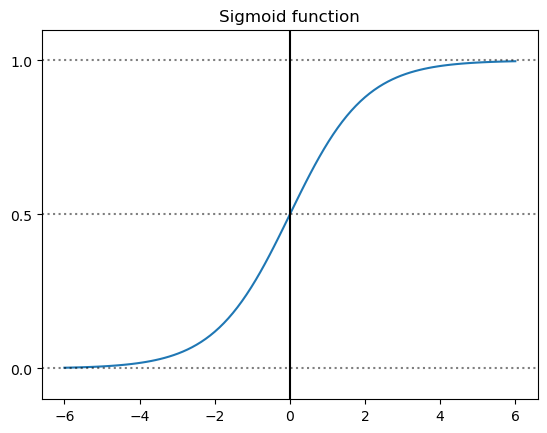

In [20]:
plot_sigmoid()

## 將迴歸模型的輸出 $Xw$ 映射至 $[0, 1]$ 之間就能獲得 $\hat{p}$

- 依據門檻值獲得 $\hat{y}$
- 此處門檻值以常見的 50% 表示。

\begin{equation}
\hat{y} = 1, \quad \text{if} \: \hat{p} \geq 0.5 \\
\hat{y} = 0, \quad \text{if} \: \hat{p} < 0.5
\end{equation}

## 資料與任務已經被定義妥善

- 特徵矩陣 $X$
- 目標向量 $y$
- 係數向量 $w$
- 任務：將 $X$ 輸入 $h$ 來預測 $\hat{y}$，$h$ 的組成可以拆解成 Sigmoid 函數 $\sigma$ 以及門檻值比較兩道程序。

## 將門檻值比較表示為階躍函式（Step function）

\begin{align}
\hat{y} &= h(X; w) \\
&= \chi(\sigma(Xw))
\end{align}

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\chi(z) = 1, \quad \text{if} \: z \geq 0.5 \\
\chi(z) = 0, \quad \text{if} \: z < 0.5
\end{equation}

## 定義評估

評估 $h$ 的方法是計算 $\hat{y}^{(train)}$ 與 $y^{(train)}$ 之間的誤分類數，誤分類數愈低，分類器的表現愈好。

\begin{align}
\operatorname*{arg\,min}_w \; J(w) = \sum_j n(E^{(train)}_j) \\ \text{ where } E^{(train)}_j \; \text{represents the occurrence of } y^{(train)}_j \neq \hat{y^{(train)}_j}
\end{align}

## 使用交叉熵（Cross-entropy）作為損失函數 $J(w)$

為了書寫方便，我們省略訓練資料的註記$(train)$。

\begin{equation}
J(w) = -\frac{1}{m}log(\sigma(Xw)), \quad \text{if} \: y = 1 \\
J(w) = -\frac{1}{m}log(1-\sigma(Xw)), \quad \text{if} \: y = 0
\end{equation}

## 交叉熵巧妙之處：讓誤分類的損失趨近無限大

- 當真實的類別 $y$ 為 1，$\sigma(Xw)$ 若離 0 比較近，預測為類別 0 的機率較高。
- 當真實的類別 $y$ 為 0，$\sigma(Xw)$ 若離 1 比較近，預測為類別 1 的機率較高。

In [21]:
def plot_cross_entropy():
    epsilon = 1e-5
    h = np.linspace(epsilon, 1-epsilon) # 利用微小值 epsilon 避免 log(0) 的錯誤
    y1 = -np.log(h)
    y2 = -np.log(1 - h)
    fig, ax = plt.subplots(1, 2, figsize = (8, 4))
    ax[0].plot(h, y1)
    ax[0].set_title("$y=1$\n$-\log(\sigma(Xw))$")
    ax[0].set_xticks([0, 1])
    ax[0].set_xticklabels([0, 1])
    ax[0].set_xlabel("$\sigma(Xw)$")
    ax[1].plot(h, y2)
    ax[1].set_title("$y=0$\n$-\log(1-\sigma(Xw))$")
    ax[1].set_xticks([0, 1])
    ax[1].set_xticklabels([0, 1])
    ax[1].set_xlabel("$\sigma(Xw)$")
    plt.tight_layout()
    plt.show()

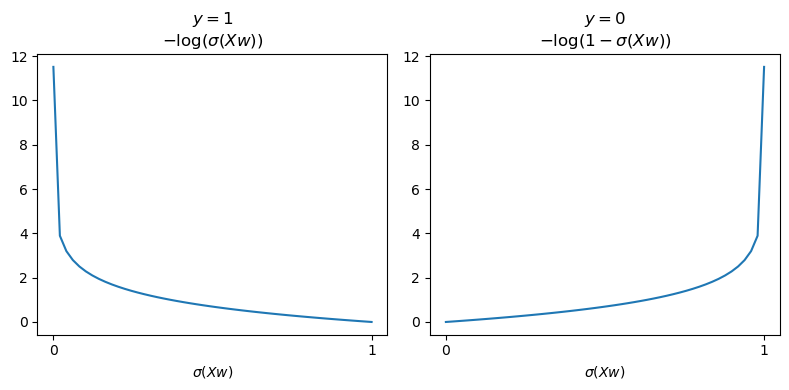

In [22]:
plot_cross_entropy()

## 將 $y$ 與 $1-y$ 加入 $J(w)$ 把兩個情境（$y=0$ 或 $y=1$）合而為一

當 $y=1$ 時，$J(w)$ 只剩下前項；當 $y=0$ 時，$J(w)$ 只剩下後項。

\begin{equation}
J(w) = \frac{1}{m}(-ylog(\sigma(Xw)) - (1-y)log(1-\sigma(Xw)))
\end{equation}

## 運用梯度遞減找到係數向量 $w^*$

\begin{equation}
w := w - \alpha \frac{\partial J}{\partial w}
\end{equation}

## 求解 $J(w)$ 關於 $w$ 的偏微分得具備三個先修知識

1. 連鎖法則（Chain rule）。
2. $e^{x}$ 關於 $x$ 的微分。
3. $log(x)$ 關於 $x$ 的微分。

## $J(w)$ 是一個由多個不同函數複合而成的損失函數

- 先是 Sigmoid 函數 $\sigma$
- 再來是 $log$ 函數。
- 欲求解複合函式偏微分得仰賴連鎖法則。

\begin{align}
(f\circ g)(x) &= f(g(x)) \\
(f\circ g)'(x) &= f'(g(x))g'(x)
\end{align}

## $e^{x}$ 關於 $x$ 的微分

\begin{equation}
\frac{d}{dx}e^{x} = e^{x}
\end{equation}

## $log(x)$ 關於 $x$ 的微分

\begin{equation}
\frac{d}{dx}log(x) = \frac{1}{x}
\end{equation}

## 推導 $J(w)$ 關於 $w$ 的偏微分

\begin{align}
\frac{\partial}{\partial w}J &= \frac{\partial}{\partial w} (-ylog(\sigma(Xw)) - (1-y)log(1-\sigma(Xw))) \\
&= -y\frac{\partial}{\partial w}log(\sigma(Xw)) - (1-y)\frac{\partial}{\partial w}(log(1-\sigma(Xw)))
\end{align}

## 首先計算 $log(\sigma(Xw))$ 關於 $w$ 的微分

\begin{align}
\frac{\partial}{\partial w}log(\sigma(Xw)) &= \frac{\partial}{\partial w}log(\sigma(Xw)) \cdot \frac{\partial}{\partial w}(\sigma(Xw)) \\
&= \frac{1}{\sigma(Xw)} \cdot \sigma'(Xw) \cdot \frac{\partial}{\partial w}Xw \\
&= \frac{1}{\sigma(Xw)} \cdot \sigma'(Xw) \cdot X
\end{align}

## 再計算 $log(1-\sigma(Xw))$ 關於 $w$ 的微分

\begin{align}
\frac{\partial}{\partial w}log(1-\sigma(Xw)) &= \frac{\partial}{\partial w}log(1-\sigma(Xw)) \cdot \frac{\partial}{\partial w}(1-\sigma(Xw)) \\
&=\frac{1}{1-\sigma(Xw)} \cdot (-\sigma'(Xw) \cdot \frac{\partial}{\partial w}Xw) \\
&=\frac{1}{1-\sigma(Xw)} \cdot (-\sigma'(Xw) \cdot X)
\end{align}

## 兩個部分都得先計算 $\sigma'(Xw)$ 也就是 Sigmoid 函數關於 $w$ 的微分，才能繼續推導

\begin{align}
\sigma'(Xw) &= \frac{\partial}{\partial w} \frac{1}{1 + e^{-Xw}} = \frac{\partial}{\partial w} (1 + e^{-Xw})^{-1} \\
&= \frac{-\frac{\partial}{\partial w}(1 + e^{-Xw})}{(1 + e^{-Xw})^2}
\end{align}

## 分子部分我們先推導 $e^{-x}$ 關於 $x$ 的微分

\begin{equation}
\frac{d}{dx}e^{-x} = \frac{d}{dx}\frac{1}{e^x} = \frac{-\frac{d}{dx} e^x}{(e^x)^2} = \frac{-e^x}{(e^x)^2} = \frac{-1}{e^x} = -e^{-x}
\end{equation}

## 於是 $\sigma'(Xw)$ 可以寫成

\begin{align}
\sigma'(Xw) &= \frac{-\frac{\partial}{\partial w}e^{-Xw}}{(1 + e^{-Xw})^2} = \frac{e^{-Xw}}{(1 + e^{-Xw})^2} \\
&= \frac{e^{-Xw}}{(1 + e^{-Xw}) \cdot (1 + e^{-Xw})}
\end{align}

## 這裡的推導有些狡猾，需要在分子設計一個 `+1-1`

\begin{align}
\sigma'(Xw) &= \frac{e^{-Xw}}{(1 + e^{-Xw}) \cdot (1 + e^{-Xw})} \\
&= \frac{1}{1 + e^{-Xw}} \cdot \frac{e^{-Xw} + 1 - 1}{1 + e^{-Xw}} = \frac{1}{1 + e^{-Xw}} \cdot ( \frac{1 + e^{-Xw}}{1 + e^{-Xw}} - \frac{1}{1 + e^{-Xw}}) \\
&=\frac{1}{1 + e^{-Xw}} \cdot ( 1 - \frac{1}{1 + e^{-Xw}}) \\
&=\sigma(Xw)(1-\sigma(Xw))
\end{align}

## 推導出 $\sigma'(Xw)$，再回去計算未完的兩個部分

\begin{align}
\frac{\partial}{\partial w}log(\sigma(Xw)) &= \frac{1}{\sigma(Xw)} \cdot \sigma'(Xw) \cdot X \\
&= \frac{1}{\sigma(Xw)}\sigma(Xw)(1-\sigma(Xw))X \\
&= (1-\sigma(Xw))X
\end{align}

\begin{align}
\frac{\partial}{\partial w}log(1-\sigma(Xw)) &= \frac{1}{1-\sigma(Xw)} \cdot (-\sigma'(Xw)) \cdot X\\
&=\frac{1}{1-\sigma(Xw)}(-(\sigma(Xw)(1-\sigma(Xw)))X) \\
&=-\sigma(Xw)X
\end{align}

## 最後回到 $J(w)$ 關於 $w$ 的偏微分

\begin{align}
\frac{\partial J}{\partial w} &= \frac{1}{m}(-y(1-\sigma(Xw))X - (1-y)(-\sigma(Xw)X)) \\
&=\frac{1}{m}(-X^Ty + y\sigma(Xw)X + X^T\sigma(Xw) - y\sigma(Xw)X) \\
&=\frac{1}{m}(-X^Ty + X^T\sigma(Xw)) \\
&=\frac{1}{m}(X^T(\sigma(Xw) - y))
\end{align}

## 梯度推導完畢

在迭代過程中 $w$ 更新的方向性取決於梯度正負號，如果梯度為正，$w$ 會向左更新（減小）；如果梯度為負，$w$ 會向右更新（增大）。

\begin{equation}
w := w - \alpha \frac{1}{m}(X^T(\sigma(X^{(train)}w) - y^{(train)})) \\
w := w - \alpha \frac{1}{m}(X^T(\sigma(\hat{y}^{(train)}) - y^{(train)}))
\end{equation}

## 自訂羅吉斯迴歸類別 LogitReg

```python
class LogitReg:
    """
    This class defines the vanilla descent algorithm for logistic regression.
    Args:
        fit_intercept (bool): Whether to add intercept for this model.
    """
    def __init__(self, fit_intercept=True):
        self._fit_intercept = fit_intercept
```

```python
    def sigmoid(self, X):
        """
        This function returns the Sigmoid output as a probability given certain model weights.
        """
        X_w = np.dot(X, self._w)
        p_hat = 1 / (1 + np.exp(-X_w))
        return p_hat
    def find_gradient(self):
        """
        This function returns the gradient given certain model weights.
        """
        m = self._m
        p_hat = self.sigmoid(self._X_train)
        X_train_T = np.transpose(self._X_train)
        gradient = (1/m) * np.dot(X_train_T, p_hat - self._y_train)
        return gradient
```

```python
    def cross_entropy(self, epsilon=1e-06):
        """
        This function returns the cross entropy given certain model weights.
        """
        m = self._m
        p_hat = self.sigmoid(self._X_train)
        cost_y1 = -np.dot(self._y_train, np.log(p_hat + epsilon))
        cost_y0 = -np.dot(1 - self._y_train, np.log(1 - p_hat + epsilon))
        cross_entropy = (cost_y1 + cost_y0) / m
        return cross_entropy
```

```python
    def fit(self, X_train, y_train, epochs=10000, learning_rate=0.001):
        """
        This function uses vanilla gradient descent to solve for weights of this model.
        Args:
            X_train (ndarray): 2d-array for feature matrix of training data.
            y_train (ndarray): 1d-array for target vector of training data.
            epochs (int): The number of iterations to update the model weights.
            learning_rate (float): The learning rate of gradient descent.
        """
        self._X_train = X_train.copy()
        self._y_train = y_train.copy()
        m = self._X_train.shape[0]
        self._m = m
        if self._fit_intercept:
            X0 = np.ones((self._m, 1), dtype=float)
            self._X_train = np.concatenate([X0, self._X_train], axis=1)
        n = self._X_train.shape[1]
        self._w = np.random.rand(n)
        n_prints = 10
        print_iter = epochs // n_prints
        for i in range(epochs):
            cross_entropy = self.cross_entropy()
            gradient = self.find_gradient()
            if i % print_iter == 0:
                print("epoch: {:6} - loss: {:.6f}".format(i, cross_entropy))
            self._w -= learning_rate*gradient
        w_ravel = self._w.ravel().copy()
        self.intercept_ = w_ravel[0]
        self.coef_ = w_ravel[1:].reshape(1, -1)
```

```python
    def predict_proba(self, X_test):
        """
        This function returns predicted probability with weights of this model.
        Args:
            X_test (ndarray): 2d-array for feature matrix of test data.
        """
        m = X_test.shape[0]
        if self._fit_intercept:
            X0 = np.ones((m, 1), dtype=float)
            self._X_test = np.concatenate([X0, X_test], axis=1)
        p_hat_1 = self.sigmoid(self._X_test).reshape(-1, 1)
        p_hat_0 = 1 - p_hat_1
        proba = np.concatenate([p_hat_0, p_hat_1], axis=1)
        return proba
    def predict(self, X_test):
        """
        This function returns predicted label with weights of this model.
        Args:
            X_test (ndarray): 2d-array for feature matrix of test data.
        """
        proba = self.predict_proba(X_test)
        y_pred = np.argmax(proba, axis=1)
        return y_pred
```

In [23]:
X = titanic_train[["Parch", "Fare"]].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
h = LogitReg()
h.fit(X_train, y_train, 100000, 0.01)

epoch:      0 - loss: 2.591563
epoch:  10000 - loss: 0.647756
epoch:  20000 - loss: 1.227990
epoch:  30000 - loss: 0.650459
epoch:  40000 - loss: 0.642875
epoch:  50000 - loss: 1.173155
epoch:  60000 - loss: 0.649876
epoch:  70000 - loss: 0.716797
epoch:  80000 - loss: 0.844682
epoch:  90000 - loss: 0.643606


In [24]:
## 預測機率
p_hat = h.predict_proba(X_valid)
p_hat[:5]

array([[0.75355379, 0.24644621],
       [0.75533004, 0.24466996],
       [0.76770564, 0.23229436],
       [0.65649865, 0.34350135],
       [0.75168382, 0.24831618]])

In [25]:
## 預測類別
y_hat = h.predict(X_valid)
print(y_hat[:5])

[0 0 0 0 0]


## 評估基於機器學習的模型：誤分類數

\begin{align}
\text{Errors}^{(valid)} = \sum_j n(E^{(valid)}_j) \\ \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [26]:
errors_ml = np.sum(np.not_equal(y_valid, y_hat))
print(errors_dummy)
print(errors_expert)
print(errors_ml)

151
79
96


## 無法描述規則的任務

## 前面的數值、類別預測任務我們都有建立基於規則的專家模型

- 有一些問題無法建立基於規則的專家模型，像是影像分類、語音識別或機器翻譯等，都屬於無法描述規則的任務。
- 對人類來說影像分類、語音識別或語言翻譯是很輕易能辦到的，但要寫出其中的規則、邏輯是極其困難的。

## 該如何處理無法描述規則的任務

- 以機器學習領域的一個分支**深度學習**來處理。
- 深度學習是一種不需要使用者**直接**決定特徵的最適化方法，而是由深度學習的結構**間接**決定。